This notebook explores the enhancement of classification performance using pre-clustered IPL cricket match data. By leveraging clustering techniques as a preprocessing step, the notebook aims to improve the accuracy of ANN classification model in predicting match outcomes.

**Key Components**

1. **Model Configuration and Training**
   - The notebook begins by defining various configurations of neural network models using different activation functions, weight initializers, and optimizers.
   - These models are compiled and trained on the pre-clustered IPL match data.

2. **Evaluation Metrics and Visualization**
   - After training the models, evaluation metrics such as accuracy score, classification report, confusion matrix, and ROC curve are computed.
   - These metrics provide insights into the performance of the models and the impact of clustering on classification accuracy.
   - Additionally, bar plots are created to compare the performance of different models based on accuracy and ROC AUC score.

**Conclusion**

The notebook demonstrates the process of building, training, and evaluating neural network models for a classification task using pre-clustered IPL cricket match data. By exploring various configurations and leveraging clustering as a preprocessing step, the notebook aims to identify the most effective model for predicting match outcomes accurately.

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split  # Importing train_test_split function for splitting data
from sklearn import metrics  # Importing scikit-learn metrics module for accuracy calculation
import pandas as pd  # Importing pandas library for data manipulation

In [ ]:
# Load the data from the CSV file
data = pd.read_csv("dataset_after_clustering.csv")

# Selecting features and target variable
X_data = data.loc[:, ["runs_to_be_scored", "balls_remaining", "wickets_remaining", "label"]]
Y_data = data.loc[:, ["match_winner"]]

# Splitting the data into training, validation, and test sets
train_data, test_data, train_label, test_label = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)
train_data, val_data, train_label, val_label = train_test_split(train_data, train_label, test_size=0.1, random_state=42)

In [ ]:
# Convert DataFrame to NumPy array and flatten label arrays
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()
train_label = train_label.to_numpy().flatten()
test_label = test_label.to_numpy().flatten()
org_test_label = test_label.copy()  # Store a copy of the original test labels

In [ ]:
traindata

array([[ 28.,  25.,   6.,   0.],
       [148.,  99.,   8.,   1.],
       [ 83.,  90.,   9.,   1.],
       ...,
       [ 68.,  10.,   2.,   0.],
       [ 79.,  35.,   6.,   0.],
       [155., 115.,  10.,   1.]])

In [ ]:
from keras.utils import to_categorical

# Convert labels to categorical format
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

# Convert labels to categorical format
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

# Define lists of activation functions, weight initializers, and optimizers
activations = ['tanh', 'softsign', 'relu', 'elu', 'sigmoid']
initializers = ['glorot_uniform', 'he_normal', 'he_uniform']
optimizers = ['adagrad', 'rmsprop', 'adadelta', 'adam', 'sgd']

# Dictionary to store accuracy scores for different configurations
acc_scores = {}

# Loop through activation functions, weight initializers, and optimizers
for activation in activations:
    for initializer in initializers:
        for optimizer in optimizers:
            # Create the model
            model = Sequential()
            model.add(Dense(1000, input_dim=4, activation=activation, kernel_initializer=initializer))
            model.add(Dense(1000, activation=activation, kernel_initializer=initializer))
            model.add(Dense(1000, activation=activation, kernel_initializer=initializer))
            model.add(Dense(2, activation='softmax', kernel_initializer=initializer))
            
            # Compile the model
            model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
            
            # Train the model
            model.fit(train_data, train_label, validation_data=(test_data, test_label), epochs=100, batch_size=1000, verbose=0)
            
            # Evaluate the model
            scores = model.evaluate(test_data, test_label, verbose=0)
            
            # Store the accuracy score
            acc_scores[(activation, initializer, optimizer)] = scores[1] * 100

# Print the accuracy scores
for config, score in acc_scores.items():
    print(f"Activation: {config[0]}, Initializer: {config[1]}, Optimizer: {config[2]}, Accuracy: {score}")

# Find the best configuration
best_config = max(acc_scores, key=acc_scores.get)
print("\nBest Configuration:")
print(f"Activation: {best_config[0]}, Initializer: {best_config[1]}, Optimizer: {best_config[2]}, Accuracy: {acc_scores[best_config]}")

Epoch 1/100
74/74 [==============================] - 19s 249ms/step - loss: 1.6959 - accuracy: 0.7203 - val_loss: 0.4629 - val_accuracy: 0.7546
Epoch 2/100
74/74 [==============================] - 18s 246ms/step - loss: 0.4497 - accuracy: 0.7662 - val_loss: 0.4440 - val_accuracy: 0.7663
Epoch 3/100
74/74 [==============================] - 18s 245ms/step - loss: 0.4435 - accuracy: 0.7715 - val_loss: 0.4350 - val_accuracy: 0.7754
Epoch 4/100
74/74 [==============================] - 18s 245ms/step - loss: 0.4482 - accuracy: 0.7685 - val_loss: 0.4560 - val_accuracy: 0.7604
Epoch 5/100
74/74 [==============================] - 18s 245ms/step - loss: 0.4473 - accuracy: 0.7679 - val_loss: 0.5102 - val_accuracy: 0.7431
Epoch 6/100
74/74 [==============================] - 18s 246ms/step - loss: 0.4517 - accuracy: 0.7659 - val_loss: 0.4316 - val_accuracy: 0.7753
Epoch 7/100
74/74 [==============================] - 18s 245ms/step - loss: 0.4365 - accuracy: 0.7752 - val_loss: 0.4291 - val_accuracy:

In [ ]:
# Get predictions from the model
pred = np.argmax(model.predict(test_data), axis=-1)

# Calculate accuracy score
accuracy = accuracy_score(org_test_label, pred)

# Print the accuracy score
print(accuracy)

0.7784264513312964

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(org_test_label, pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77      8415
         1.0       0.82      0.76      0.79      9913

    accuracy                           0.78     18328
   macro avg       0.78      0.78      0.78     18328
weighted avg       0.78      0.78      0.78     18328



In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(org_test_label, pred)

# Print the confusion matrix
print(cm)

array([[6733, 1682],
       [2379, 7534]])

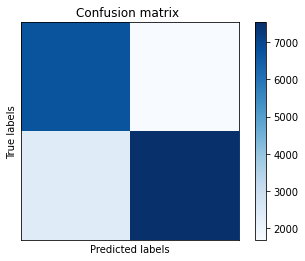

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Calculate confusion matrix
cm = metrics.confusion_matrix(org_test_label, pred)

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

In [ ]:
def plot_roc_curve(fpr, tpr):
    """
    Plot ROC curve.

    Parameters:
    fpr (array-like): False Positive Rate.
    tpr (array-like): True Positive Rate.

    Returns:
    None
    """
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class
probs = model.predict_proba(test_data)[:, 1]

# Compute AUC
auc = roc_auc_score(org_test_label, probs)

# Print AUC score
print('AUC:', auc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:430: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


AUC: 0.88


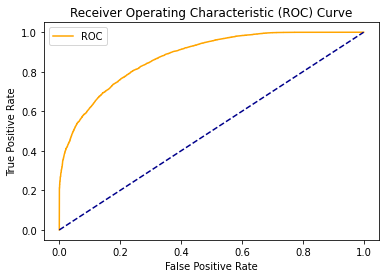

In [ ]:
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(org_test_label, probs)

# Plot ROC curve
plot_roc_curve(fpr, tpr)

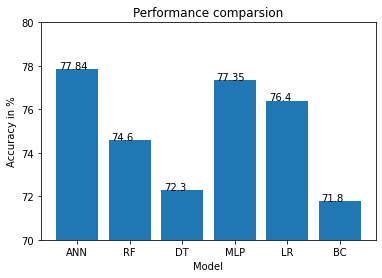

In [ ]:
import matplotlib.pyplot as plt

# Function to add value labels
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], f'{y[i]:.2f}', ha='center', va='bottom')

x = ["ANN", "RF", "DT", "MLP", "LR", "BC"]
y = [77.84, 74.6, 72.3, 77.35, 76.4, 71.8]

# Making the bar chart
plt.bar(x, y)

# Calling the function to add value labels
addlabels(x, y)

# Giving title to the plot
plt.title("Performance Comparison")

# Adding X and Y labels
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.ylim(70, 80)

# Visualizing the plot
plt.show()

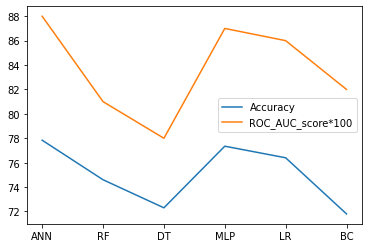

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = ["ANN", "RF", "DT", "MLP", "LR", "BC"]
y = [77.84, 74.6, 72.3, 77.35, 76.4, 71.8]
z = [88, 81, 78, 87, 86, 82]

# Plot lines
plt.plot(x, y, label="Accuracy")
plt.plot(x, z, label="ROC_AUC_score*100")

# Adding legend
plt.legend()

# Display the plot
plt.show()